# Introduction

> Customer analytics is a process of understanding and gaining insights into customer behavior through analyzing customer behavior data.

The information and insights gained through customer analytics can then be utilized in forming marketing strategies, optimizing sales channels, and making other key business decisions.

Example customer analytics:
- Sales funnel analytics
> Analyzing a sequence of different steps a user takes before reaching a conversion.
- Customer segmentation
> The process of dividing a customer base into distinct groups of individuals that have similar characteristics.
- Predictive analytics
> Making a predictions about future outcomes using historical data combined with statistical modeling.

# Exercise

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('./data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**Analytics on engage customers**

- Overall engagement rate
- Engagement rates by offer type
- Engagement rates by offer type and vehicle class
- Engagement rates by sales channel
- Engagement rates by sales channel and vehicle size

In [6]:
# 1. Overall engagement rate

df.groupby('Response')['Customer'].count()

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

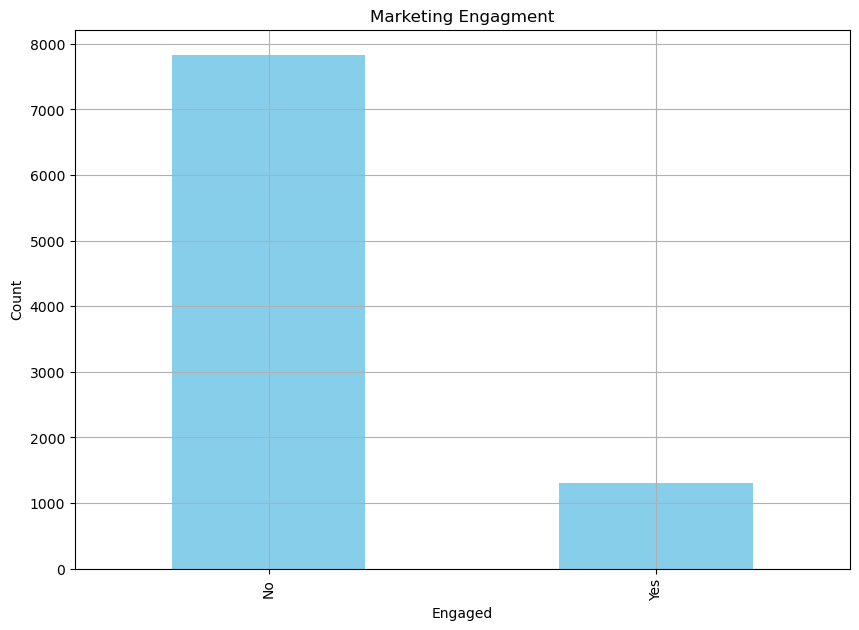

In [7]:
ax = df.groupby('Response')['Customer']\
        .count()\
        .plot(kind='bar',
              color='skyblue',
              grid=True,
              figsize=(10, 7),
              title='Marketing Engagment')

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()

In [8]:
df.groupby('Response')['Customer'].count() / df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

NOTE: We can see that only about 14% of the customers responded to the marketing calls.

In [9]:
# 2. Engagement rates by offer type
count_offer_type_yes = df.loc[df['Response'] == 'Yes']\
                        .groupby(['Renew Offer Type'])\
                        .count()['Customer']
count_offer_type = df.groupby(['Renew Offer Type']).count()['Customer']

by_offer_type = (count_offer_type_yes / count_offer_type).fillna(0)
by_offer_type

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4    0.000000
Name: Customer, dtype: float64

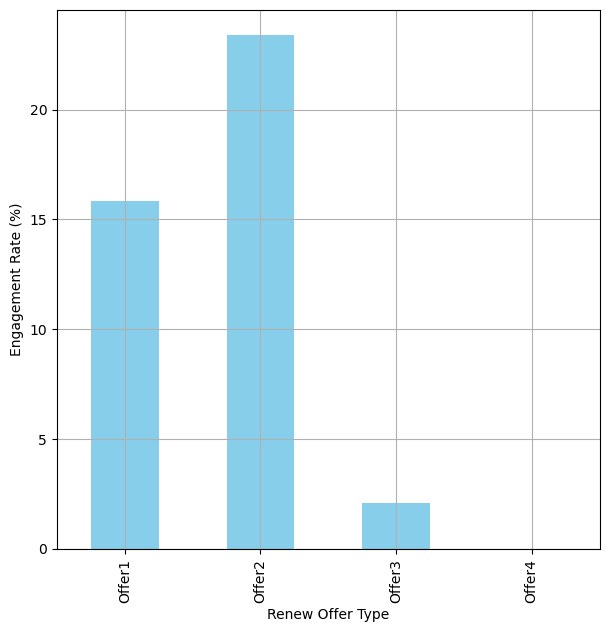

In [10]:
ax = (by_offer_type*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

NOTES:
- From this plot, Offer2 had the highest engagement rate among the customers.
- When conducting customer analytics, we often want to know the demographics and attributes of customers for each event, so that we can understand what works best for which type of customers. 

In [11]:
# 3. Engagement rates by offer type and vehicle class

count_offer_type_vehicle_yes = df.loc[df['Response'] == 'Yes']\
                                    .groupby(['Renew Offer Type',
                                              'Vehicle Class'])\
                                    .count()['Customer']

by_offer_type_vehicle = count_offer_type_vehicle_yes / count_offer_type
by_offer_type_vehicle

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [12]:
by_offer_type_vehicle = by_offer_type_vehicle.unstack().fillna(0)

by_offer_type_vehicle

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


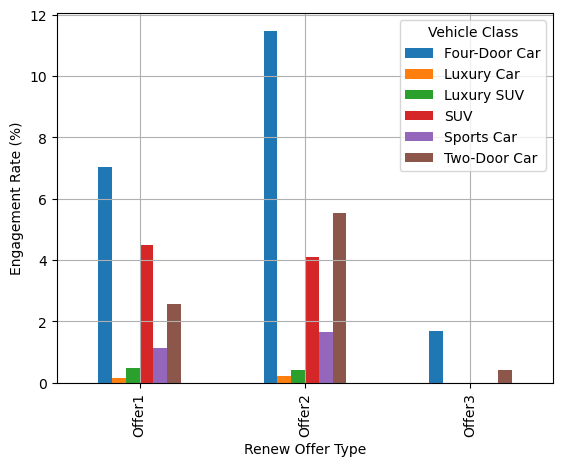

In [13]:
ax = (by_offer_type_vehicle*100.0).plot(
    kind='bar',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

NOTES:
- Customers with Four-Door Car respond the most frequently for all offer types.
- Customers with SUV respond with a higher chance to Offer1 than to Offer2.
- If we see any significant difference in the response rates among different customer segments, we can fine-tune who to target for different sets of offers.

a. Example: If we believe customers with SUV respond to Offer1 with a significantly higher degree of engagement than to Offer2, then we can target SUV customers with Offer1.

b. Example: If we believe customers with Two-Door Car respond to Offer2 with a significantly higher degree of engagement than to other offer types, then we can target Two-Door Car owners with Offer2.

In [14]:
# 4. Engagement rates by sales channel
count_sales_channel_yes = df.loc[df['Response'] == 'Yes']\
                            .groupby(['Sales Channel'])\
                            .count()['Customer']

count_sales_channel = df.groupby(['Sales Channel'])\
                        .count()['Customer']

by_sales_channel = count_sales_channel_yes / count_sales_channel

by_sales_channel

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

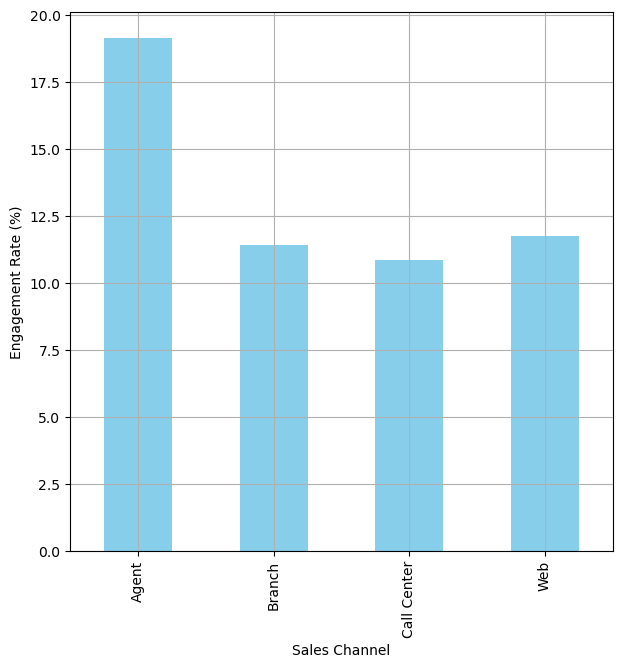

In [15]:
ax = (by_sales_channel*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

NOTES: Agent works the best in terms of getting responses from the customers. Then, sales through Web works the second best.

In [16]:
# 5. Engagement rates by sales channel and vehicle size

count_sales_channel_yes = df.loc[df['Response'] == 'Yes']\
                            .groupby(['Sales Channel', 'Vehicle Size'])\
                            .count()['Customer']
count_sales_channel = df.groupby(['Sales Channel']).count()['Customer']

by_sales_channel = count_sales_channel_yes / count_sales_channel
by_sales_channel

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [17]:
by_sales_channel = by_sales_channel.unstack().fillna(0)
by_sales_channel

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


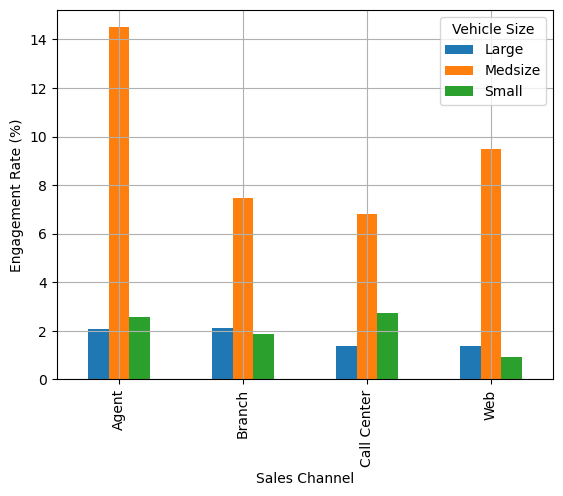

In [18]:
ax = (by_sales_channel * 100).plot(kind='bar', grid=True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

NOTES: 
- The engagement rates across different sales channels differ slightly between Large and Small vehicle owners.
-  Small vehicle owners respond better through Agent and Call Center channels.
- Large vehicle owners respond better through the Branch and Web channels.
- Small car owners respond with a higher chance through Agent and Call Center, we can utilize those two channels more heavily for Small car owners.

**Segmenting customer base**

In this section, we will be segmenting our customer base by Customer Lifetime Value and Months Since Policy Inception.

In [19]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

Based on this information, we are going to define those customers with a Customer Lifetime Value higher than the median as high-CLV customers and those with a CLV below the median as low-CLV customers.

In [20]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
    lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)

In [21]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

Since Policy Inception higher than the median as high Policy Age Segment customers and those below the median as low Policy Age Segment customers.

In [22]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)

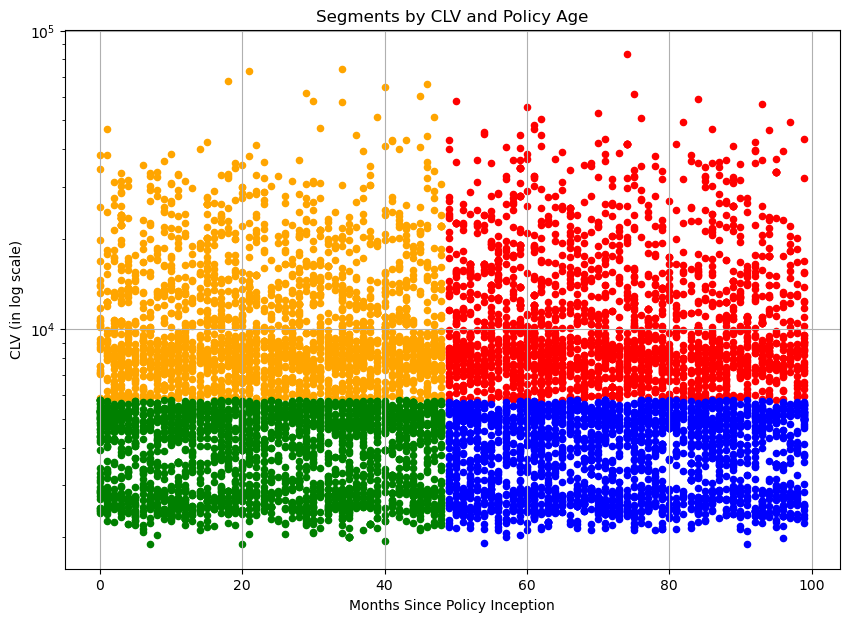

In [23]:
ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='red'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue'
)

df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='green',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

In [24]:
engagment_rates_by_segment = df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']/df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']

engagment_rates_by_segment

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

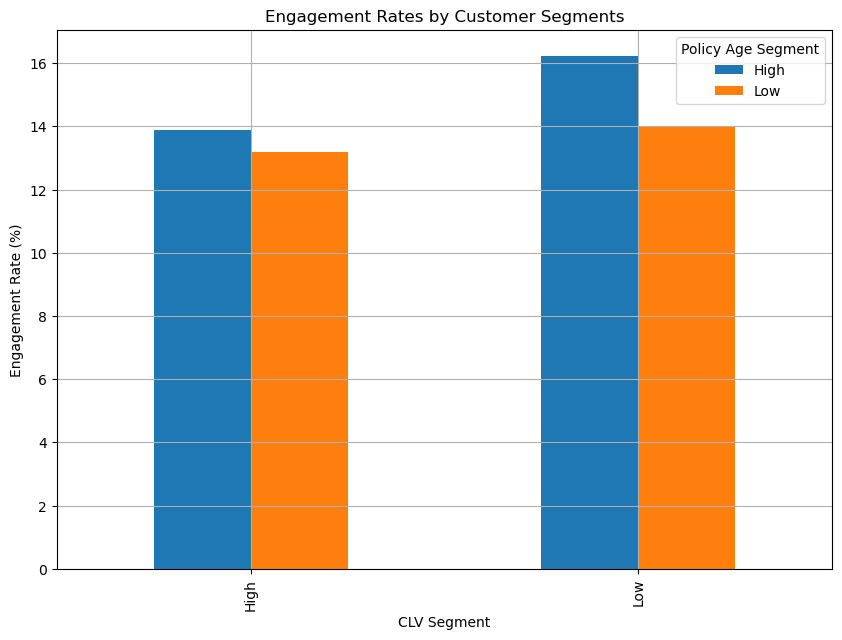

In [25]:
ax = (engagment_rates_by_segment.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()

NOTES:
- High Policy Age Segment has higher engagement than the Low Policy Age Segment. This suggests that those customers who have been insured by this company longer respond better.
- It is also noticeable that the High Policy Age and Low CLV segment has the highest engagement rate among the four segments.

**Predictive Analytics**

Case: Predicting the likelihood of marketing engagement.

In [26]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

# Respone variable encoding
df['Engaged'] = df['Response'].apply(lambda x : 1 if x == 'Yes' else 0)

# Categorical variable encoding
columns_to_encoce = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
]

columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]
categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)
    
# Gender Encoding
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

categorical_features.append('Is.Female')

all_features = continuous_features + categorical_features
response = 'Engaged'

sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,0,0,0,0,1,0,0,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,1,1,0,0,0,0,0,1,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,1,0,0,0,0,0,0,1,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,1,0,0,0,0,1,0,0,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,1,0,0,0,0,1,0,0,0


In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)


In [32]:
sample_df.shape


(9134, 51)

In [31]:
x_train.shape

(6393, 50)

In [33]:
x_test.shape

(2741, 50)

In [34]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [35]:
rf_model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=950845345),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1769204377),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=835521952),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=810871184),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2051239293),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=522503776),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=61858176),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=511809470),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=897975035),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=674090242),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=497583744),
 DecisionTreeClassifier(max_depth=5, m

In [36]:
rf_model.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=950845345)

In [37]:
rf_model.estimators_[0].predict(x_test)[:10]

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
rf_model.estimators_[1].predict(x_test)[:10]

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
rf_model.estimators_[2].predict(x_test)[:10]

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
rf_model.estimators_[3].predict(x_test)[:10]

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
# Feature Importances


rf_model.feature_importances_

array([0.07985643, 0.07978652, 0.06125128, 0.0290443 , 0.04977581,
       0.01011076, 0.02171856, 0.07665651, 0.04452798, 0.00618798,
       0.00706041, 0.00750912, 0.00400006, 0.00668191, 0.00713751,
       0.00406418, 0.00085433, 0.00209519, 0.00414522, 0.00263415,
       0.00389893, 0.00050563, 0.00068377, 0.00059984, 0.00161969,
       0.00125236, 0.00158641, 0.00085042, 0.00107553, 0.00226057,
       0.00110043, 0.0014676 , 0.00104139, 0.00343585, 0.02892362,
       0.0075248 , 0.30128546, 0.02875179, 0.03705879, 0.01606781,
       0.01346857, 0.00356087, 0.00530648, 0.00402698, 0.00544928,
       0.00471407, 0.00358411, 0.00520765, 0.00269417, 0.00589893])

In [43]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
36,0.301285,EmploymentStatus.Retired
0,0.079856,Customer.Lifetime.Value
1,0.079787,Income
7,0.076657,Total.Claim.Amount
2,0.061251,Monthly.Premium.Auto
4,0.049776,Months.Since.Policy.Inception
8,0.044528,Sales.Channel.Agent
38,0.037059,Marital.Status.Divorced
3,0.029044,Months.Since.Last.Claim
34,0.028924,EmploymentStatus.Employed


NOTES:
- As you can see from this output, the EmploymentStatus.Retired feature seems to be the most important factor in making the final prediction and the Income, Total.Claim.Amount, and Customer.Lifetime.Value features follow as the second, third, and fourth most important features.

In [44]:
# Evaluating models
from sklearn.metrics import accuracy_score, precision_score, recall_score

in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [45]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8814
Out-of-Sample Accuracy: 0.8646


In [46]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.9925
Out-of-Sample Precision: 0.9273


In [47]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1494
Out-of-Sample Recall: 0.1220


In [48]:
# ROC-AUC

from sklearn.metrics import roc_curve, auc


in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [49]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [50]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8849
Out-Sample AUC: 0.8488


NOTES:
- If you see a big gap between these two numbers, it is a sign of overfitting and you should try to address it by pruning the trees in the forest by tuning the hyperparameters, such as the maximum depth and minimum number of samples to split.

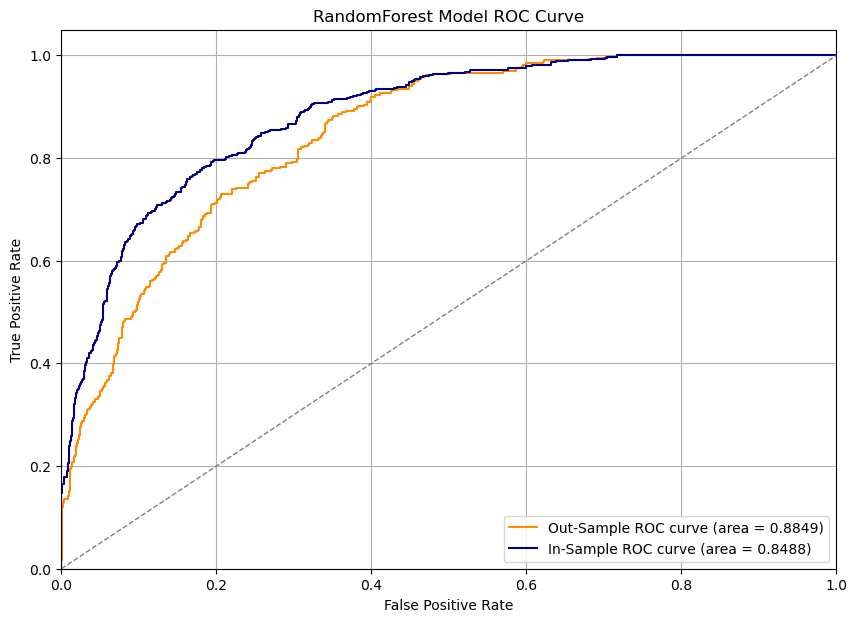

In [51]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()